In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
IMAGES_PATH = r"E:\Jupyter\handson-ml2\images\training_linear_models"

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 一、线性回归
$y=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$（n个特征）

$x^{(i)}=(X_1^{(i)},X_2^{(i)},...,X_n^{(i)})$（每一行代表样本，每一列代表特征）

$\hat y^{(i)}=\theta_0+\theta_1X_1^{(i)}+\theta_2X_2^{(i)}+...+\theta_nX_n^{(i)}$

$\theta=(\theta_0,\theta_1,\theta_2,...,\theta_n)^T$

$\hat y^{(i)}=\theta_0X_0^{(i)}+\theta_1X_1^{(i)}+\theta_2X_2^{(i)}+...+\theta_nX_n^{(i)}$,即$X_0^{(i)}≡1$
 
$X^{(i)}=(X_0^{(i)},X_1^{(i)},X_2^{(i)},...,X_n^{(i)})$

$\hat y^{(i)}=X^{(i)}·\theta$

$X_b=\begin{pmatrix}
1&X_1^{(1)}&X_2^{(1)}&...&X_n^{(1)}\\
1&X_1^{(2)}&X_2^{(2)}&...&X_n^{(2)}\\
...&&&&...\\
1&X_1^{(m)}&X_2^{(m)}&...&X_n^{(m)}\\
\end{pmatrix}$(n个特征,m个样本)

$\theta=\begin{pmatrix}
\theta_0\\
\theta_1\\
\theta_2\\
...\\
\theta_n\\
\end{pmatrix}$($\theta_0是截距(intercept)也是偏置项，\theta_1至\theta_n是系数(coefficients)$)

$\hat y^{(i)}=X_b·\theta$


目标：使$\sum_{i=1}^m(y^{(i)}-\hat y^{(i)})^2$尽可能小

所以此时的目标：使$(y-X_b·\theta)^T(y-X_b·\theta)$尽可能小<br/>
该<font color="blue">正规方程解(Normal Equation)</font>为<font color="red">$\theta=(X_b^TX_b)^{-1}X_b^Ty$</font><br/>
问题：时间复杂度高：$O(n^3)$(优化后为$O(n^{2.4})$)<br/>
优点：不需要对数据做归一化处理

## 1.标准方程

公式：<font color="red">$\theta=(X_b^TX_b)^{-1}X_b^Ty$</font><br/>

Saving figure generated_data_plot


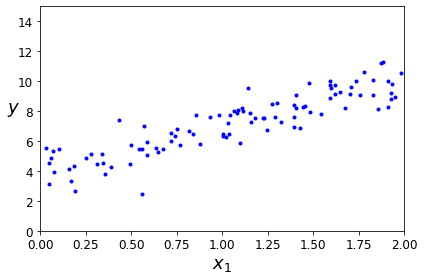

In [3]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [5]:
X_b = np.c_[np.ones((100,1)),X] # add x0=1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.86501051],
       [3.13916179]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86501051],
       [10.14333409]])

Saving figure linear_model_predictions_plot


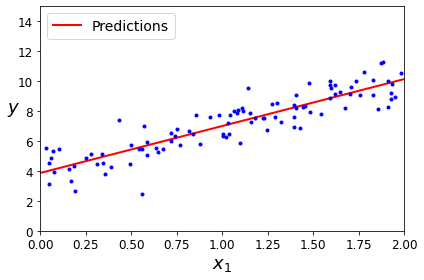

In [10]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.86501051]), array([[3.13916179]]))

In [12]:
lin_reg.predict(X_new)

array([[ 3.86501051],
       [10.14333409]])

`LinearRegression`类基于`scipy.linalg.lstsq()`函数（即“最小二乘”）,可以直接调用

In [13]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.86501051],
       [3.13916179]])

此函数计算$\hat \theta=X^+y$，其中$X^+$是$X$的伪逆(Moore-Penrose逆)。可以调用`np.linalg.pinv()`来直接计算这个伪逆。

In [22]:
np.linalg.pinv(X_b).dot(y)

array([[3.86501051],
       [3.13916179]])

# 二、梯度下降
1.不是一个机器学习算法，是一种基于搜索的最优化方法<br/>
2.作用：最小化一个损失函数<br/>
3.梯度上升法：最大化一个效用函数<br/>
但并未所有函数都有唯一极值点，这就容易生成局部最优解而非全局最优解。<br/>
解决方案：多次运行，<font color="blue">随机化初始点</font>，梯度下降法的初始点也是一个超参数。

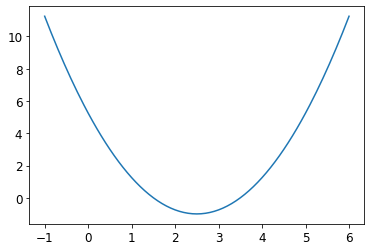

In [23]:
plot_x = np.linspace(-1,6,141)
plot_y = (plot_x - 2.5) ** 2 - 1
plt.plot(plot_x,plot_y)
plt.show()

In [24]:
def dJ(theta):
    return 2 * (theta - 2.5)

def J(theta):
    try:
        return (theta - 2.5) ** 2 - 1
    except:
        return float("inf")

公式：
<font size=4>$\theta_j:=\theta_j-\eta\frac{\partial}{\partial\theta_j}J(\theta_0,\theta_1,...,\theta_n)$</font>

In [31]:
theta = 0.0
eta = 0.1
epsilon = 1e-8
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient#eta为学习率
    
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break
print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


In [37]:
def gradient_descent(initial_theta,eta,n_iters=1e4,epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient#eta为学习率
        theta_history.append(theta)
    
        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
        i_iter += 1
def plot_theta_history():
    plt.plot(plot_x,J(plot_x))
    plt.plot(np.array(theta_history),J(np.array(theta_history)),color="r",marker="+")
    plt.show()
    

学习率过小：

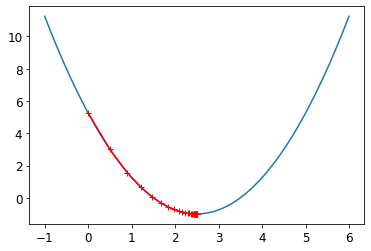

(None, 46)

In [38]:
eta = 0.1
theta_history = []
gradient_descent(0.,eta)
plot_theta_history(),len(theta_history)

学习率过大：

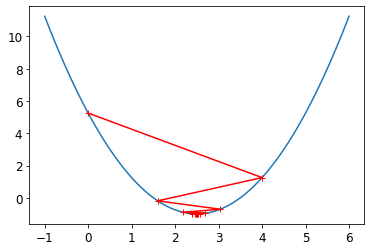

(None, 22)

In [40]:
eta = 0.8
theta_history = []
gradient_descent(0.,eta)
plot_theta_history(),len(theta_history)

学习率大于1：

In [42]:
eta = 1.1
theta_history = []
gradient_descent(0.,eta)
theta_history[-1]#nan即not a number,∞ - ∞ = nan

nan

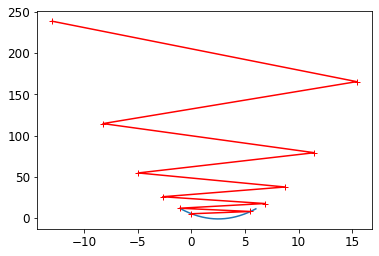

In [45]:
eta = 1.1
theta_history = []
gradient_descent(0.,eta,n_iters=10)
plot_theta_history()

## 1.批量梯度下降
要实现梯度下降，你需要计算每个模型关于参数$\theta_j$的成本函数的梯度。换言之，你需要计算的是如果改变$\theta_j$，成本函数会改变多少。这被称为偏导数。

目标：使<font size=4>$J(\theta)=\frac{1}{2m}\sum_{i=1}^m(y^{(i)}-\hat y^{(i)})^2$</font>尽可能小<br/><br/>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;<font size=4>$J(\theta)=\frac{1}{2}MSE(y,\hat y)$<br/><br/>
$\nabla J(\theta)=\frac{1}{m}·\begin{pmatrix}
\sum_{i=1}^m(y^{(i)}-X_b^{(i)}\theta)·(-X_0^{(i)})\\
\sum_{i=1}^m(y^{(i)}-X_b^{(i)}\theta)·(-X_1^{(i)})\\
\sum_{i=1}^m(y^{(i)}-X_b^{(i)}\theta)·(-X_2^{(i)})\\
...\\
\sum_{i=1}^m(y^{(i)}-X_b^{(i)}\theta)·(-X_n^{(i)})\\
\end{pmatrix}$
$
\nabla J(\theta)=\frac{1}{m}·\begin{pmatrix}
\sum_{i=1}^m(X_b^{(i)}\theta-y^{(i)})·X_0^{(i)}\\
\sum_{i=1}^m(X_b^{(i)}\theta-y^{(i)})·X_1^{(i)}\\
\sum_{i=1}^m(X_b^{(i)}\theta-y^{(i)})·X_2^{(i)}\\
...\\
\sum_{i=1}^m(X_b^{(i)}\theta-y^{(i)})·X_n^{(i)}\\
\end{pmatrix}(X_0^{(i)}=1)$
    
<font size=4>$\nabla J(\theta)=\frac{1}{m}·\begin{pmatrix}
\sum_{i=1}^m(X_b^{(i)}\theta-y^{(i)})·X_0^{(i)}\\
\sum_{i=1}^m(X_b^{(i)}\theta-y^{(i)})·X_1^{(i)}\\
\sum_{i=1}^m(X_b^{(i)}\theta-y^{(i)})·X_2^{(i)}\\
...\\
\sum_{i=1}^m(X_b^{(i)}\theta-y^{(i)})·X_n^{(i)}\\
\end{pmatrix}(X_0^{(i)}=1)$<br/><br/>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;$=\frac{1}{m}((X_b\theta-y)^T·X_b)^T$<br/><br/>
<font color="red">&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;$=\frac{1}{m}·X_b^T·(X_b\theta-y)$</font>
    
梯度下降步骤：
<font size=3>$\theta_j:=\theta_j-\eta\frac{\partial}{\partial\theta_j}J(\theta_0,\theta_1,...,\theta_n)$</font>

In [46]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[3.86501012],
       [3.13916211]])

In [47]:
X_new_b.dot(theta)

array([[ 3.86501012],
       [10.14333433]])

In [50]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 1 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


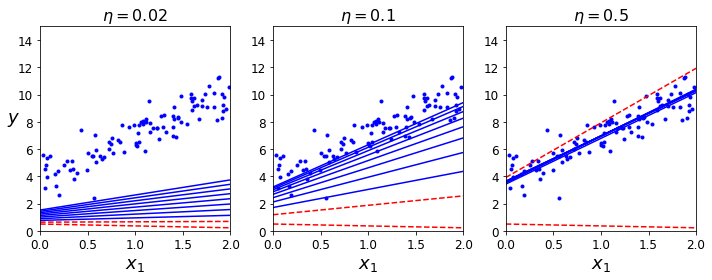

In [52]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

## 2.随机梯度下降
### ①批量梯度下降法BGD(Batch Gradient Descent)
缺点：每次都需要对i从1到m累加，样本数若过大，则非常耗时
### ②随机梯度下降法SGD(Stochastic Gradient Descent)
1.用一定的精度换取时间<br/>
2.跳出局部最优解<br/>
3.每次只随机取一个固定的样本i,以此作为搜索的方向（并非梯度的方向）<br/>
<font size=3>$$\begin{pmatrix}
(X_b^{(i)}\theta-y^{(i)})·X_0^{(i)}\\
(X_b^{(i)}\theta-y^{(i)})·X_1^{(i)}\\
(X_b^{(i)}\theta-y^{(i)})·X_2^{(i)}\\
...\\
(X_b^{(i)}\theta-y^{(i)})·X_n^{(i)}\\
\end{pmatrix}(X_0^{(i)}=1)=(X_b^{(i)})^T·(X_b^{(i)}\theta-y^{(i)})$$
<font size=3>4.学习率至关重要，并且随着迭代次数增加而减少<br/>
<font size=5>$\eta=\frac{1}{i\underline{}iters}$
<font size=2>$(样本少时递减过快)$
<font size=5>$→\eta=\frac{a}{i\underline{}iters+b}$<br/>
<font size=2>PS：涉及了模拟退火思想</font>
    
<font size=2>    
&ensp;&ensp;&ensp;&ensp;由于算法的随机性质，它比批量梯度下降算法下降要不规则得多。成本函数将不再是缓缓降低直到抵达最小值，而是不断上上下下，但是从总体来看，还是在慢慢下降。随着时间的推移，最终会非常接近最小值，但是即使达到了最小值，依旧还会持续反弹，永远不会停止。所以算法停下来的参数值肯定是足够好的，但不是最优的。
    
&ensp;&ensp;&ensp;&ensp;当成本函数非常不规则时，随机梯度下降其实可以帮助算法跳出局部最小值，所以相比批量梯度下降，它对找到全局最小值更有优势。
    

&ensp;&ensp;&ensp;&ensp;因此，随机性的好处在于可以逃离局部最优，但缺点是永远定位不出最小值。要解决这个困境，有一个办法是逐步降低学习率。开始的步长比较大（这有助于快速进展和逃离局部最小值），然后越来越小，让算法尽量靠近全局最小值。这个过程叫模拟退火，因为它类似于冶金时融化的金属慢慢冷却的退火过程。确定每个迭代学习率的函数叫作学习率调度。若学习率降得太快，可能会陷入局部最小值，甚至是停留在走向最小值的半途中。若学习率降得太慢，则需要太长时间才能跳到差不多最小值附近，如果提早结束训练，可能只得到一个次优的解决方案。

Saving figure sgd_plot


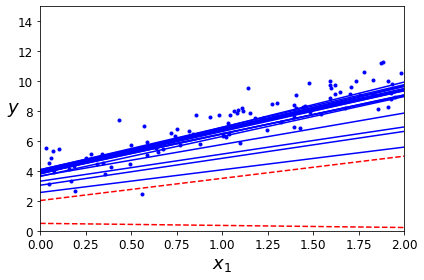

In [58]:
theta_path_sgd = []
m=len(X_b)
np.random.seed(42)

n_epochs = 50
a,b = 5,50

def learning_schedule(t):
    return a / (t + b)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch ==0 and i<20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 1 else "r--"
            plt.plot(X_new,y_predict,style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()             

In [59]:
theta

array([[3.90521218],
       [3.15642095]])

In [71]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1,random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [72]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.86256592]), array([3.15101583]))

# 3.小批量梯度下降

In [80]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
theta,t

(array([[3.87558894],
        [3.13893713]]),
 250)

Saving figure gradient_descent_paths_plot


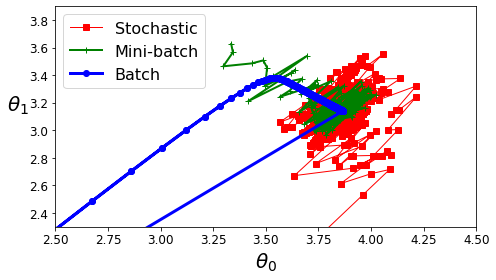

In [81]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

# 三、多项式回归
首先，让我们基于一个简单的二次方程式生成一些非线性数据

Saving figure quadratic_data_plot


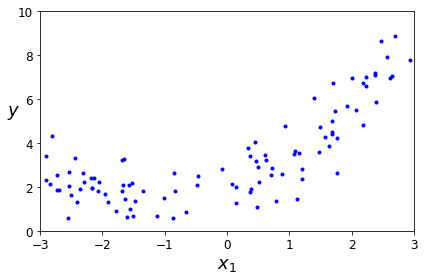

In [84]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)#0.5x^2+x+C

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.62278195])

In [89]:
X_poly[0]#X^0,X^1,X^2

array([1.        , 0.62278195, 0.38785736])

X_poly现在包含X的原始特征以及该特征平方。

In [91]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_#C,x^0,x^1,x^2

(array([1.95163088]), array([[0.        , 0.96364196, 0.4388373 ]]))

In [93]:
lin_reg.score(X_poly,y)

0.807391040468203

Saving figure quadratic_predictions_plot


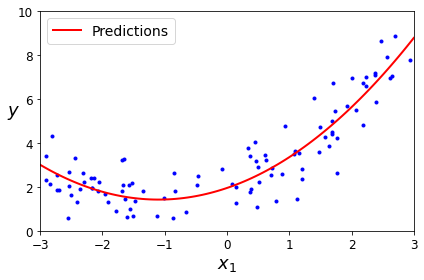

In [92]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

# 四、学习曲线

Saving figure high_degree_polynomials_plot


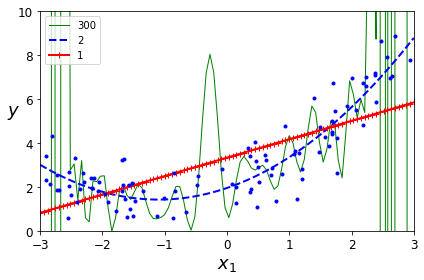

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

Saving figure underfitting_learning_curves_plot


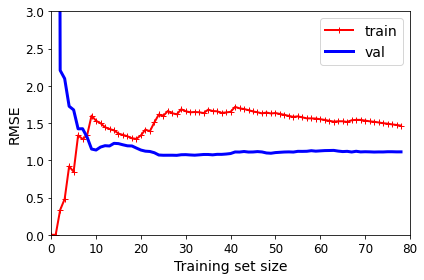

In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

上图为欠拟合，验证集表现差且训练集和验证集误差都很大

Saving figure learning_curves_plot


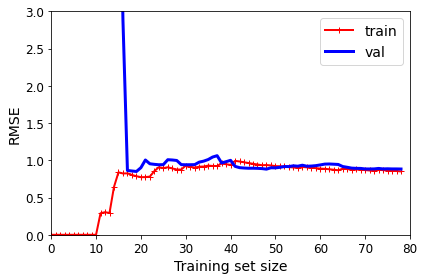

In [96]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

上图为过拟合，在训练集的表现好，验证集表现不好

Saving figure learning_curves_plot


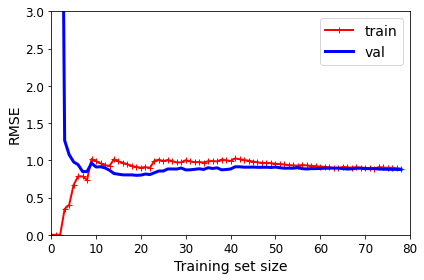

In [98]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()

误差稳定在1.0左右，效果较线性回归好

### 偏差方差权衡
#### 1.偏差(Bias)
导致偏差的主要原因：对问题本身的假设不正确<br/>
如对非线性数据使用线性回归<br/>
会造成欠拟合

#### 2.方差(Variance)
数据的一点点扰动都会较大地影响模型<br/>
通常是因为使用的模型太复杂，如高阶多项式回归<br/>
会造成过拟合

PS:非参数学习通常都是高方差算法，因为不对数据进行任何假设<br/>
&ensp;&ensp;&ensp;而参数学习通常都是高偏差算法，因为对数据有极强的假设

3.机器学习的主要挑战来自于方差<br/>
解决高方差的通常手段：①降低模型复杂度<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;②减少数据维度；降噪<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;③增加样本数<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;④使用验证集<br/>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;<font color="red">⑤模型正则化(Regularization)<br/>

# 五、正则化线性模型
减少过拟合的一个好方法是对模型进行正则化(即约束模型):它拥有的自由度越少，则过拟合数据的难度就越大。正则化多项式模型的一种简单方法是减少多项式的次数。

对于线性模型，正则化通常是通过约束模型的权重来实现的。现在，我们看一下岭回归、Lasso回归和弹性网络，它们实现了三种限制权重的方法。
## 1.岭回归
岭回归(也称为Tikhonov正则化)是线性回归的正则化版本：将等于$\alpha \sum_{i=1}^n\theta_i^2$的正则化项添加到成本函数。这迫使学习算法不仅拟合数据，而且还使模型权重尽可能小。注意仅在训练期间将正则化项添加到成本函数中。训练完模型后，你要使用非正则化的性能度量来评估模型的性能。

超参数$\alpha$控制要对模型进行正则化的程度。若$\alpha=0,$则岭回归仅是线性回归。如果$\alpha$非常大，则所有权重最终都非常接近于0，结果是一条经过数据均值的平线。

目标：使<font size=4>$\sum_{i=1}^m(y^{(i)}-\theta_0-\theta_1X_1^{(i)}-\theta_2X_2^{(i)}-...-\theta_nX_n^{(i)})^2$</font>尽可能小<br/><br/>
目标：使<font size=4>$J(\theta)=MSE(y,\bar y;\theta)$</font>尽可能小<br/>

解决方案：<br/>
加入模型正则化，目标：使<font size=4>$J(\theta)=MSE(y,\bar y;\theta)+\alpha \frac{1}{2}\sum_{i=1}^n\theta_i^2$</font>尽可能小

注意，<font color=blue>偏置项$\theta_0$没有进行正则化(总和从$i=1$开始，而不是0)</font>。如果我们将$\omega$定义为特征权重的向量($\theta_1$至$\theta_n$),则正则项等于$\frac{1}{2}||\omega||_2^2$,其中$||\omega||_2$表示权重向量的$l_2$范数。对于梯度下降，只需将$\alpha\omega$添加到MSE梯度向量。

<font color=blue>在执行岭回归之前缩放数据很重要，因为它对输入特征的缩放敏感。</font>大多数正则化模型都需要如此。

闭式解的岭回归：<font size=4>$\hat \theta=(X^TX+\alpha A)^{-1}X^Ty$

In [117]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [118]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

Saving figure ridge_regression_plot


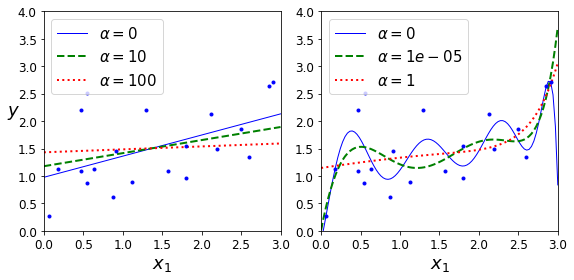

In [119]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

In [120]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## 2.Lasso回归
线性回归的另一种正则化叫作最小绝对收缩和选择算子回归(Least Absolute Shrinkage and Selection Operator Regression,简称Lasso回归)。与岭回归一样，它也是向成本函数添加一个正则项，但它增加的是权重向量的$l_1$范数。

目的：使<font size=4>$J(\theta)=MSE(y,\bar y;\theta)+\alpha \sum_{i=1}^n|\theta_i|$</font>尽可能小<br/><br/>

Lasso回归的一个重要特点是它倾向于完全消除掉最不重要特征的权重。Lasso回归会自动执行特征选择并输出一个稀疏模型(即只有很少的特征有非零权重).

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8028677038274386, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


Saving figure lasso_regression_plot


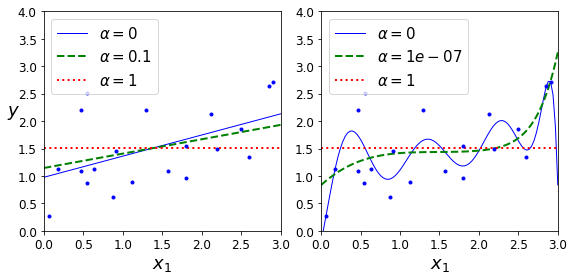

In [121]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

In [122]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [123]:
sgd_reg = SGDRegressor(penalty="l1", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47011206])

Saving figure lasso_vs_ridge_plot


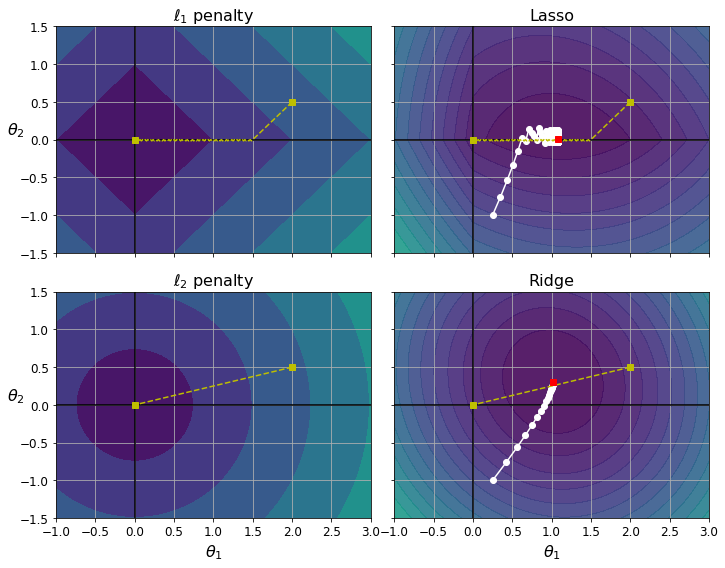

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

save_fig("lasso_vs_ridge_plot")
plt.show()

## 3.弹性网络

<font size=4>$J(\theta)=MSE(y,\bar y;\theta)+r\alpha \sum_{i=1}^n|\theta_i|+\frac{1-r}{2}\alpha \sum_{i=1}^n\theta_i^2$</font><br/><br/>
岭回归计算相对精准，但若样本过多，计算量较大。<br/><br/>
LASSO急于将某些变量归0，容易丢失数据，造成高偏差。<br/><br/>

In [124]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)#l1_ratio对应混合比r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## 4.提前停止

对于梯度下降这一类迭代学习的算法，还有一个与众不同的正则化方法，就是在验证误差达到最小值时停止训练，该方法叫做提前停止法。

使用随机和小批量梯度下降时，曲线不是那么平滑，可能很难知道模型是否达到了最小值。一种解决方案是仅在验证错误超过最小值一段时间后停止(当你确信模型不会做得更好时)，然后回滚模型参数到验证误差最小的位置。

In [108]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [109]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

Saving figure early_stopping_plot


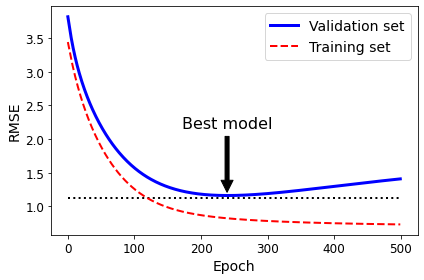

In [110]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [111]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

# 六、逻辑回归
## 1、估计概率
与线性回归模型一样，逻辑回归模型也是输入特征的加权和（加上偏置项），但是不同于线性回归模型直接输出结果，它输出的是结果的数理逻辑值。

### ①公式
用于解决分类问题，将样本的特征与样本发生的概率联系在一起。<br/><br/>
<font size=4>$\hat y=f(x),\hat p=f(x),\hat y=\begin{cases}
1,\hat p≥0.5\\
0,\hat p＜0.5\\
\end{cases}$<br/><br/></font>
逻辑回归既可以看作是回归算法，也可以看做是分类算法，通常作为分类算法用，只可以解决二分类问题。<br/><br/>
<font size=4>$\hat y=f(x)→\hat y=\theta^T·x_b，\hat y\in (-∞，+∞)$</font>而概率的<font size=4>$y\in[0,1]$<br/><br/></font>
所以得到新的函数<font size=4>$\hat p=\sigma(\theta^T·x_b),\sigma(t)=\frac{1}{1+e^{-t}}$(Sigmoid函数,$p\in(0,1)$)<br/><br/>
$t>0$时，$p>0.5$<br/><br/>
$t<0$时，$p<0.5$<br/><br/>
$\hat p=\sigma(\theta^T·x_b)=\frac{1}{1+e^{-\theta^T·x_b}}$<br/><br/></font>
问题：对于给定的样本数据集X,y，如何找到参数theta，使得用这样的方式可以最大程度获得样本数据集X对应的分类输出y?

Saving figure logistic_function_plot


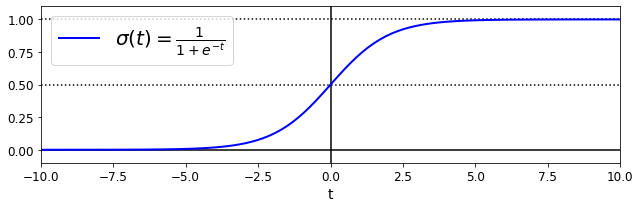

In [125]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

### ②损失函数
<font size=4>$cost=\begin{cases}
如果y=1,p越小,cost越大\\
如果y=0,p越大,cost越大\\
\end{cases}$<br/>&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;↓<br/>
$cost=\begin{cases}
-log(\hat p)\quad\quad\quad if\quad y=1\\
-log(1-\hat p)\quad \ \ if\quad y=0\\
\end{cases}$<br/>&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;↓<br/>
$cost=-ylog(\hat p)-(1-y)log(1-\hat p)$<br/>&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;↓<br/>
$J(\theta)=-\frac{1}{m}\sum_{i=1}^m[y^{(i)}log(\hat p^{(i)})+(1-y^{(i)})log(1-\hat p^{(i)})]$<br/>&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;↓<br/>
$J(\theta)=-\frac{1}{m}\sum_{i=1}^m[y^{(i)}log(\sigma(X_b^{(i)}\theta))+(1-y^{(i)})log(1-\sigma(X_b^{(i)}\theta))]$<br/><br/>
<font size=3>没有公式解，只能使用梯度下降法求解，并且该函数无局部最优解，只有全局最优解。

### ③损失函数的梯度
$\nabla J(\theta)=\frac{1}{m}\begin{pmatrix}
\sum_{i=1}^m(y^{(i)}-\sigma(X_b^{(i)}\theta))·(-X_0^{(i)})\\
\sum_{i=1}^m(y^{(i)}-\sigma(X_b^{(i)}\theta))·(-X_1^{(i)})\\
\sum_{i=1}^m(y^{(i)}-\sigma(X_b^{(i)}\theta))·(-X_2^{(i)})\\
...\\
\sum_{i=1}^m(y^{(i)}-\sigma(X_b^{(i)}\theta))·(-X_n^{(i)})\\
\end{pmatrix}=\frac{1}{m}\begin{pmatrix}
\sum_{i=1}^m(\sigma(X_b^{(i)}\theta-y^{(i)}))·X_0^{(i)}\\
\sum_{i=1}^m(\sigma(X_b^{(i)}\theta-y^{(i)}))·X_1^{(i)}\\
\sum_{i=1}^m(\sigma(X_b^{(i)}\theta-y^{(i)}))·X_2^{(i)}\\
...\\
\sum_{i=1}^m(\sigma(X_b^{(i)}\theta-y^{(i)}))·X_n^{(i)}\\
\end{pmatrix}(X_0^{(i)}=1)
$=<font color="red"><font size=4>$\frac{1}{m}·X_b^T·(\sigma(X_b\theta)-y)$

### ④决策边界
<font size=4>$\hat y=f(x),\hat p=f(x),\hat y=\begin{cases}
1,\hat p≥0.5，t>0时，p>0.5,即\theta^T·x_b≥0\\
0,\hat p＜0.5\ \ ，t<0时，p<0.5,即\theta^T·x_b＜0\\
\end{cases}$<br/><br/></font>
决策边界即为：<font size=4>$\theta^T·x_b=0$</font>

如果$x$有两个特征,即<font size=4>$\theta_0+\theta_1x_1+\theta_2x_2=0,x_2=\frac{-\theta_0-\theta_1x_1}{\theta_2}$</font>

In [126]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [127]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [140]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [144]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

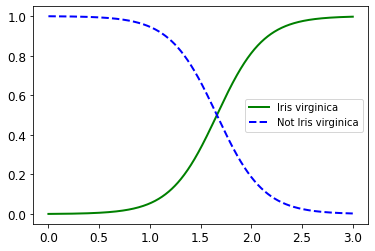

In [146]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.legend()
plt.show()

E:\Anaconda3\lib\site-packages\matplotlib\patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


Saving figure logistic_regression_plot


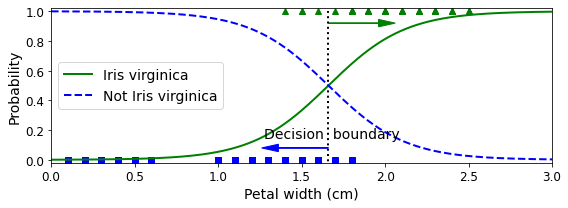

In [160]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 1], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [130]:
decision_boundary

array([1.66066066])

In [131]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Saving figure logistic_regression_contour_plot


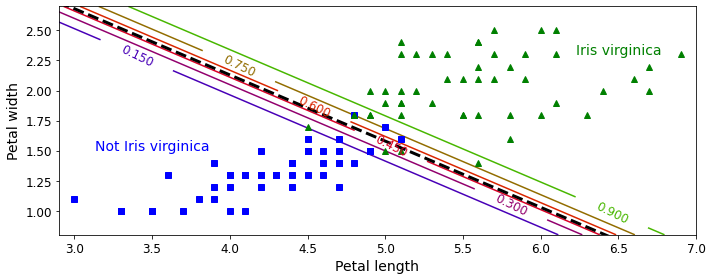

In [132]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

# 2.Softmax回归
逻辑回归模型经过推广，可以直接支持多个类别，而不需要训练并组合多个二元分类器。这就是Softmax回归，或者叫做多元逻辑回归。

原理很简单：给定一个实例$x$，Softmax回归模型首先计算出每个类$k$的分数$s_k(x)$，然后对这些分数应用$softmax$函数(也叫归一化指数)，估算出每个类的概率。

+ 类$k$的$softmax$分数$$s_k(x)=x^T\theta^{(k)}$$

请注意，每个类都有自己的特定参数向量$\theta^{(k)}$。

一旦为实例$x$计算了每个类的分数，就可以通过softmax函数来估计实例属于类$k$的概率$\hat p_k$。该函数计算每个分数的指数，然后对其进行归一化。

+ Softmax函数$$\hat p_k=\sigma(s(x))_k=\frac{exp(s_k(x))}{\sum_{j=1}^Kexp(s_j(x))}$$

就像逻辑回归分类器一样，Softmax回归分类器预测具有最高估计概率的类。

+ Softmax回归分类预测$$\hat y=argmax_k\sigma(s(x))_k=argmax_ks_k(x)=argmax_k((\theta^{(k)})^Tx)$$

PS:Softmax回归分类器一次只能预测一个类，因此它只能与互斥的类一起使用。

目前已经知道了模型如何进行概率估算并做出预测，那我们再来看看怎么训练。训练目标是得到一个能对目标类做出高概率估算的模型。通过交叉熵最小化来实现这个目标，因为当模型对目标类做出较低概率的估算时会受到惩罚。交叉熵经常被用于衡量一组估算出的类概率跟目标类的匹配程度。

+ 交叉熵成本函数$$J(\theta)=-\frac{1}{m}\sum\limits_{i=1}^m\sum\limits_{k=1}^Ky_k^{(i)}log(\hat p_k^{(i)})$$
$y_k^{(i)}$是属于类k的第$i$个实例的目标概率。一般而言等于1或0，具体取决于实例是否属于该类。



+ 类$k$的交叉熵梯度向量，即上述成本函数相对于$\theta^{(k)}的梯度向量$$$\nabla_{\theta(k)}J(\theta)=\frac{1}{m}\sum\limits_{i=1}^m(\hat p_k^{(i)}-y_k^{(i)})x^{(i)}$$
现在，我们可以计算每个类的梯度向量，然后使用梯度下降(或任何其他优化算法)来找到最小化成本函数的参数矩阵$\theta$。


<center><font size=4>交叉熵</font></center>

>&ensp;&ensp;&ensp;&ensp;交叉熵源于信息理论。假设你想要有效传递每天的天气信息，选项（晴、下雨等）有8个，那么可以用3bit对每个选项进行编码。但是，若我们认为几乎每天都是晴天，那么，对“晴天”用1bit(0),其他7个类用4bit(从1开始)进行编码，显然会有效率一些。交叉熵测量的是你每次发送天气选项的平均bit数。如果你对天气的假设是完美的，交叉熵将会等于天气本身的熵（也就是其本身固有的不可预测性）。但是如果你的假设是错误的（比如经常下雨），交叉熵将会变大，增加的这一部分我们称之为KL散度(Kullback-Leibler divergence,也叫作相对熵)。<br/>
&ensp;&ensp;&ensp;&ensp;两个概率分布$p$和$q$之间的交叉熵定义为$H(p,q)=-\sum_xp(x)logq(x)$(至少在离散分布时可以这样定义)。

In [161]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

Saving figure softmax_regression_contour_plot


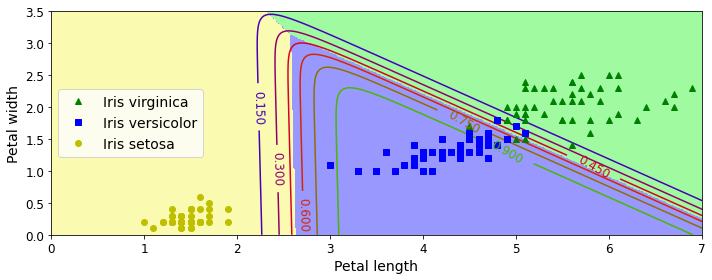

In [134]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

In [135]:
softmax_reg.predict([[5, 2]])

array([2])

In [136]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])